This notebook will consist of cleaning and preprocessing the data. Imputing and dropping missing values, columns, as well as adding new features will make up the bulk of this notebook.

The overall goal of this project is to use customer reviews to predict whether a traveller's experience led to a yes/no recommendation for an airline. This will allow travellers to choose the right airline for their travel needs and have a smooth travel experience. It can also help airlines monitor the the quality of their services provided on each flight for each route, thereby increasing the likelihood of receiving a yes recommendation, and also boosting their customer traffic. 

The dataset was acquired from Kaggle, and was webscraped from the Skytrax website by Divyansh Agrawal. Now that we know where the dataset comes from, we can begin the cleaning process. 

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

The next step is reading in the dataset.

In [2]:
# Read in the airline dataset
df = pd.read_csv('capstone_airline_reviews 1.csv')

To do a quick overview of the dataset, let's use the `.head()` function to see what kind of data we'll be dealing with and to conduct an initial examination to see what columns to drop/keep.

In [3]:
# Check the dataset
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,19-May,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,19-May,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,7th May 2019,✅ Trip Verified | Rome to Prishtina via Istanb...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,19-May,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,✅ Trip Verified | Flew on Turkish Airlines IAD...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,19-Apr,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,✅ Trip Verified | Mumbai to Dublin via Istanbu...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,19-May,1.0,1.0,1.0,1.0,1.0,1.0,no


It looks like we'll have a bit of cleaning to do just based on the first 5 rows. But before that, let's check the shape of the dataset.

In [4]:
# Checking shape
df.shape

(65947, 17)

So far we are dealing with 65,947 rows by 17 columns. That is most likely to change once we begin the cleaning process. Next, let's see what types of data we'll be dealing with.

In [5]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65947 entries, 0 to 65946
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64(7

The current datasets consists of *floats* and *objects*. Going back on our first impressions of the dataset, we can create a more detailed method to see whether any column needs to be altered. The process is as follows below:

In [6]:
# Check all float columns
df.select_dtypes('float64').head()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,7.0,4.0,5.0,4.0,4.0,2.0,4.0
1,2.0,4.0,1.0,1.0,1.0,1.0,1.0
2,3.0,1.0,4.0,1.0,3.0,1.0,2.0
3,10.0,4.0,5.0,5.0,5.0,5.0,5.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Everything looks good so far for the numerical (*float*) data types. Nothing has to be altered as of yet. Next, let's take a look at the categorical (*object*) data types.

In [7]:
# Check all object columns
df.select_dtypes('object').head()

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,recommended
0,Turkish Airlines,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,19-May,yes
1,Turkish Airlines,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,19-May,no
2,Turkish Airlines,M Galerko,7th May 2019,✅ Trip Verified | Rome to Prishtina via Istanb...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,19-May,no
3,Turkish Airlines,Zeshan Shah,6th May 2019,✅ Trip Verified | Flew on Turkish Airlines IAD...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,19-Apr,yes
4,Turkish Airlines,Pooja Jain,6th May 2019,✅ Trip Verified | Mumbai to Dublin via Istanbu...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,19-May,no


Apart from the missing values that stand out almost immediately for the `aircraft` variable, both the `review_date` and `flown_date` columns appear as *object* data types. We can use the `.to_datetime()` method to convert them to a datetime format. However, upon closer inspection, it appears that they both convey the same kind of information. The only difference is that the `flown_date` variable isn't as detailed as the `review_date` variable, only stating the month and year whereas the `review_date` column conveys the day of travel. 

On second glance, it also appears that the two dates occur around the same time. Even though this is an assumption, it does to be true. Even for the 4th row, where the flight occurred in April, but the review was written on May 6th 2019, they occur around the same season, or at most, can be a few weeks apart. Of course, I re-iterate again that is an assumption, but one I can get behind on. Therefore, I will be dropping the `flown_date` column as it is not detailed as the `review_date` column and I am going forward with the assumption that the two events (flight and review) occur either at the same time, or a few weeks apart.

The following steps involve dropping the `flown_date` variable and converting the `review_date` to a datetime format. 

In [8]:
# Convert the review_date to datetime 
# Drop date_flown column

df.drop(columns='date_flown', inplace=True)
df['review_date'] = pd.to_datetime(df['review_date'])

# Check the dataset using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65947 entries, 0 to 65946
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          65947 non-null  object        
 1   overall          64017 non-null  float64       
 2   author           65947 non-null  object        
 3   review_date      65947 non-null  datetime64[ns]
 4   customer_review  65947 non-null  object        
 5   aircraft         19718 non-null  object        
 6   traveller_type   39755 non-null  object        
 7   cabin            63303 non-null  object        
 8   route            39726 non-null  object        
 9   seat_comfort     60681 non-null  float64       
 10  cabin_service    60715 non-null  float64       
 11  food_bev         52608 non-null  float64       
 12  entertainment    44193 non-null  float64       
 13  ground_service   39358 non-null  float64       
 14  value_for_money  63975 non-null  float

The `review_date` column has been converted to a datetime format and the `flown_date` has been successfully dropped. Next, let's take a brief look at the type of numerical data in the dataset. 

In [9]:
# Check both numeric and categorical data
numeric_columns = df.select_dtypes(exclude='object').columns
categorical_columns = df.select_dtypes('object').columns

In [10]:
# Check
list(numeric_columns)

['overall',
 'review_date',
 'seat_comfort',
 'cabin_service',
 'food_bev',
 'entertainment',
 'ground_service',
 'value_for_money']

In [11]:
# Check
list(categorical_columns)

['airline',
 'author',
 'customer_review',
 'aircraft',
 'traveller_type',
 'cabin',
 'route',
 'recommended']

Performed a quick summary on the numerical data using `.describe()` method.

In [12]:
# Use describe() method
df[numeric_columns].describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**Key Points**:

- **Overall**: The overall review is a score (from 1-10) given to the airline for that specific flight and encompasses the scores of all the individual variables (seat comfort, cabin service, etc.) given for that flight. For the entire dataset, the average overall airline score is 5.1
- **Seat Comfort**: The seat comfort is rated on a scale of 1-5, one being a bad score and 5 a great score. For the dataset, the average seat comfort score is 2.9
- **Cabin Service**: The cabin service is rated on a scale of 1-5. It rates the overall service of the cabin crew and their hospitality. For the dataset, the average cabin service score is 3.2
- **Food and Beverage**: The food and beverage service is rated on a scale of 1-5. Travellers can rate the quality of the meal selection (or lack thereof), drinks selection, and meal selection on a scale of 1-5. For the dataset, the average food and beverage score is 2.9
- **Entertainment**: The entertainment score is rated on a scale of 1-5 where travellers can rate the quality of entertainment for the flight. This has to do with wifi service, movie/tv show selection, games selection, etc. For the dataset, the average entertainment score is 2.8
- **Ground Service**: The ground service score is rated on a scale of 1-5 and incorporates the overall traveller experience when navigating through the airport. Factors than can influence the score include check-in service, security screening, wait times, airport food selection, amenities, baggage service, etc. For the dataset, the average ground service score is 2.7
- **Value for Money**: The value for money score is rated on a scale of 1-5 and allows the traveller to give a numerical rating of whether they feel the cost of the flight was worth their overall experience. For the dataset, the average value for money score is 2.9

We can now move onto checking for missing values. 

In [13]:
# Check
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,2019-05-08,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,2019-05-07,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,2019-05-07,✅ Trip Verified | Rome to Prishtina via Istanb...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,2019-05-06,✅ Trip Verified | Flew on Turkish Airlines IAD...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Pooja Jain,2019-05-06,✅ Trip Verified | Mumbai to Dublin via Istanbu...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,1.0,1.0,no


We can see that the `aircraft` column contains missing values. But to be certain of missing values in dataset of ~65000 rows, we can use the `.isna()` and `.sum()` methods.

In [14]:
# Check for missing values
df.isna().sum()

airline                0
overall             1930
author                 0
review_date            0
customer_review        0
aircraft           46229
traveller_type     26192
cabin               2644
route              26221
seat_comfort        5266
cabin_service       5232
food_bev           13339
entertainment      21754
ground_service     26589
value_for_money     1972
recommended         1507
dtype: int64

Turns out that there are multiple columns with missing values in thousands of rows. To get a more accurate representation of how much data each column is missing, we can perform a quick percentage calculation of missing values.

In [15]:
# Percentage of missing values
df.isna().sum()/len(df)*100

airline             0.000000
overall             2.926593
author              0.000000
review_date         0.000000
customer_review     0.000000
aircraft           70.100232
traveller_type     39.716742
cabin               4.009280
route              39.760717
seat_comfort        7.985200
cabin_service       7.933644
food_bev           20.226849
entertainment      32.987096
ground_service     40.318741
value_for_money     2.990280
recommended         2.285168
dtype: float64

Multiple columns have <10% of their values missing. I have decided to drop the missing rows for these columns because they represent a small portion of the dataset (with the majority of them missing <5%) and can be afforded to be dropped. 

In [16]:
# Drop missing rows for variables that contain <10% missing data
df.dropna(subset=['overall',
                  'cabin',
                  'seat_comfort',
                  'cabin_service',
                  'value_for_money',
                  'recommended'], inplace=True)

In [17]:
# Check the new shape
df.shape

(58288, 16)

We have now reduced the size of our original dataset from 65,947 rows to 58,288 rows. Do keep in mind that we had also dropped the `flown_date` column earlier. Time to check the missing values once for the remaining dataset.

In [18]:
# Check percentage of missing values for remaining columns
df.isna().sum()/len(df)*100

airline             0.000000
overall             0.000000
author              0.000000
review_date         0.000000
customer_review     0.000000
aircraft           66.351565
traveller_type     33.722207
cabin               0.000000
route              33.770244
seat_comfort        0.000000
cabin_service       0.000000
food_bev           13.304625
entertainment      27.288636
ground_service     33.955531
value_for_money     0.000000
recommended         0.000000
dtype: float64

There are columns that still appear to have quite a bit of missing data. Before addressing the missing values from the `aircraft`, `traveller_type` and `route` columns, I will tackle the missing data for the numeric variables - `food_bev`, `entertainment`, and `ground_service` as it will be easier to impute.

Also, for the numeric imputation, I will be comparing the mode/median values as I do not want an average float number (i.e. 3.4), but a nice, round number (i.e. 2.0).

##### Food and Beverage Imputation

In [19]:
df['food_bev'].median()

3.0

In [20]:
df['food_bev'].mode()

0    1.0
dtype: float64

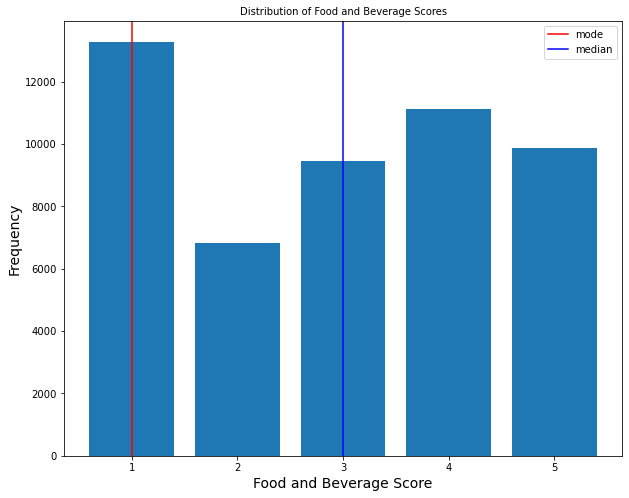

In [21]:
# Finding out the total number of counts for food and beverage
df['food_bev'].value_counts()

# Creating a summary dataframe of Average Score counts
foodbev_score_df = pd.DataFrame(df['food_bev'].value_counts())
foodbev_score_df.columns = ['Count']
foodbev_score_df.head()

# Plotting the Food_Bev Score Distribution
plt.figure(figsize=(10,8))

# Add the mode
plt.axvline(df['food_bev'].mode()[0], color='red', label='mode')
# Add the median
plt.axvline(df['food_bev'].median(), color='blue', label='median')

plt.bar(foodbev_score_df.index, foodbev_score_df['Count'])
plt.xticks(foodbev_score_df.index)
plt.xlabel('Food and Beverage Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Food and Beverage Scores', fontsize=10)
plt.legend()
plt.show()

The Food and Beverage score distribution appears to have a slight right skew, as the majority of travellers gave a score of 1.0 when it came to Food and Beverage selection on their flights. I will be using the median score of 3.0 to impute into this column as I believe there is a higher chance that customers would have an average experience when it comes to the Food and Beverage service on a flight.

In [22]:
# Fill in the missing values with the median score of 3.0
df['food_bev'] = df['food_bev'].fillna(3.0)

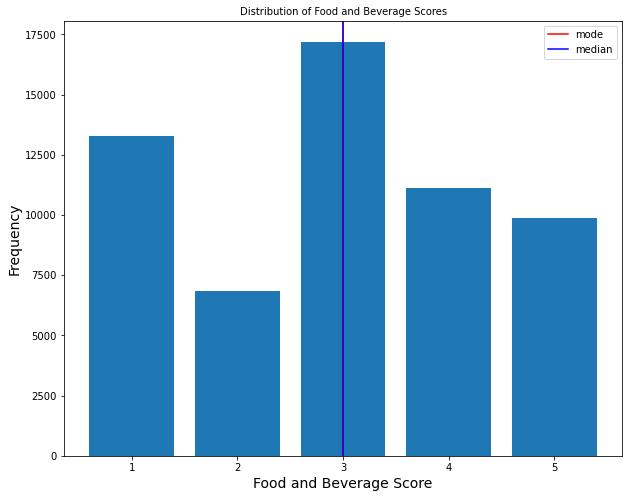

In [23]:
# Updated visualizatio of the distribution Food and Beverage scores
df['food_bev'].value_counts()

# Creating a summary dataframe of Average Score counts
foodbev_score_df = pd.DataFrame(df['food_bev'].value_counts())
foodbev_score_df.columns = ['Count']
foodbev_score_df.head()

# Plotting the Food_Bev Score Distribution
plt.figure(figsize=(10,8))

# Add the mode
plt.axvline(df['food_bev'].mode()[0], color='red', label='mode')
# Add the median
plt.axvline(df['food_bev'].median(), color='blue', label='median')

plt.bar(foodbev_score_df.index, foodbev_score_df['Count'])
plt.xticks(foodbev_score_df.index)
plt.xlabel('Food and Beverage Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Food and Beverage Scores', fontsize=10)
plt.legend()
plt.show()

Imputing the median score of 3.0 to the Food and Beverage column has created a normal distribution among the scores. The next step is imputing missing values for the *entertainment* column.

##### Entertainment Imputation

In [24]:
df['entertainment'].median()

3.0

In [25]:
df['entertainment'].mode()

0    1.0
dtype: float64

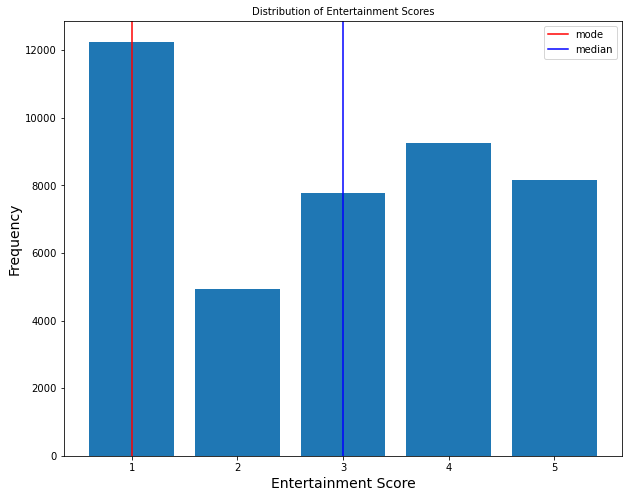

In [26]:
# Finding out the total number of counts for Entertainment
df['entertainment'].value_counts()

# Creating a summary dataframe of Average Score counts
entertainment_score_df = pd.DataFrame(df['entertainment'].value_counts())
entertainment_score_df.columns = ['Count']
entertainment_score_df.head()

# Plotting the Food_Bev Score Distribution
plt.figure(figsize=(10,8))

# Add the mode
plt.axvline(df['entertainment'].mode()[0], color='red', label='mode')
# Add the median
plt.axvline(df['entertainment'].median(), color='blue', label='median')

plt.bar(entertainment_score_df.index, entertainment_score_df['Count'])
plt.xticks(entertainment_score_df.index)
plt.xlabel('Entertainment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Entertainment Scores', fontsize=10)
plt.legend()
plt.show()

The Entertainment score distribution also displays a right skew. I will be using the median Entertainment score to impute the missing values just as I did for the Food and Beverage imputation. 

In [27]:
# Fill in the missing values with the median score of 3.0
df['entertainment'] = df['entertainment'].fillna(3.0)

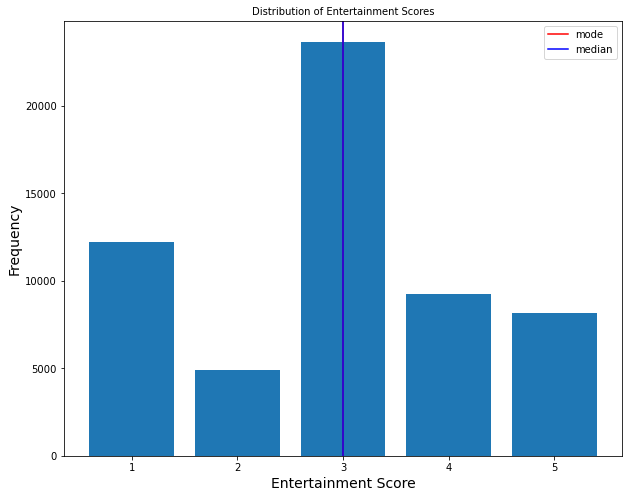

In [28]:
# Updated visualizatio of the distribution Entertainment scores
df['entertainment'].value_counts()

# Creating a summary dataframe of Average Score counts
entertainment_score_df = pd.DataFrame(df['entertainment'].value_counts())
entertainment_score_df.columns = ['Count']
entertainment_score_df.head()

# Plotting the Food_Bev Score Distribution
plt.figure(figsize=(10,8))

# Add the mode
plt.axvline(df['entertainment'].mode()[0], color='red', label='mode')
# Add the median
plt.axvline(df['entertainment'].median(), color='blue', label='median')

plt.bar(entertainment_score_df.index, entertainment_score_df['Count'])
plt.xticks(entertainment_score_df.index)
plt.xlabel('Entertainment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Entertainment Scores', fontsize=10)
plt.legend()
plt.show()

The distribution now is definitely more akin to a normal distribution. 

##### Ground Service Imputation

In [29]:
df['ground_service'].median()

3.0

In [30]:
df['ground_service'].mode()

0    1.0
dtype: float64

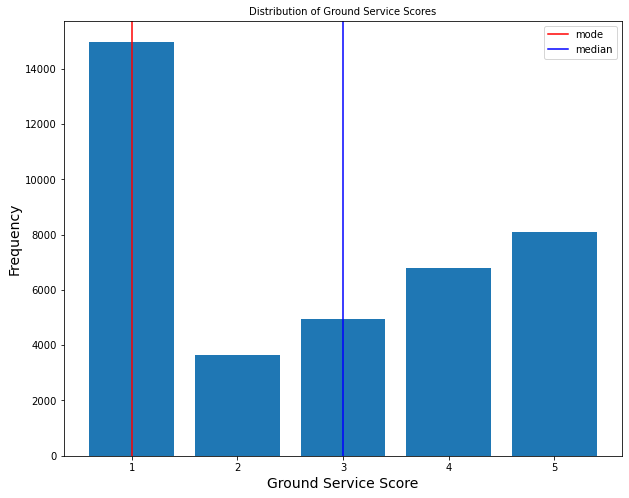

In [31]:
# Initial visualizatio of the distribution Entertainment scores
df['ground_service'].value_counts()

# Creating a summary dataframe of Average Score counts
groundservice_score_df = pd.DataFrame(df['ground_service'].value_counts())
groundservice_score_df.columns = ['Count']
groundservice_score_df.head()

# Plotting the Food_Bev Score Distribution
plt.figure(figsize=(10,8))

# Add the mode
plt.axvline(df['ground_service'].mode()[0], color='red', label='mode')
# Add the median
plt.axvline(df['ground_service'].median(), color='blue', label='median')

plt.bar(groundservice_score_df.index, groundservice_score_df['Count'])
plt.xticks(groundservice_score_df.index)
plt.xlabel('Ground Service Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Ground Service Scores', fontsize=10)
plt.legend()
plt.show()

Just as the previous two cases, the data is skewed to the right, and once again I will be using the median score of Ground Service to impute the missing values.

In [32]:
# Fill in the missing values with the median score of 3.0
df['ground_service'] = df['ground_service'].fillna(3.0)

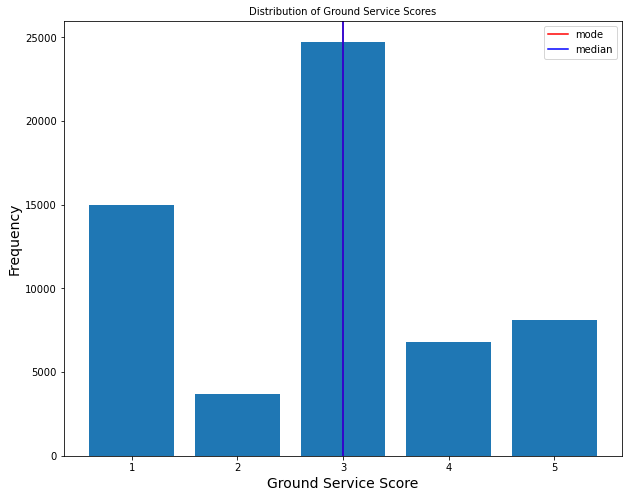

In [33]:
# Updated visualizatio of the distribution Entertainment scores
df['ground_service'].value_counts()

# Creating a summary dataframe of Average Score counts
groundservice_score_df = pd.DataFrame(df['ground_service'].value_counts())
groundservice_score_df.columns = ['Count']
groundservice_score_df.head()

# Plotting the Food_Bev Score Distribution
plt.figure(figsize=(10,8))

# Add the mode
plt.axvline(df['ground_service'].mode()[0], color='red', label='mode')
# Add the median
plt.axvline(df['ground_service'].median(), color='blue', label='median')

plt.bar(groundservice_score_df.index, groundservice_score_df['Count'])
plt.xticks(groundservice_score_df.index)
plt.xlabel('Ground Service Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Ground Service Scores', fontsize=10)
plt.legend()
plt.show()

Ground Service scores now has a normal distribution. With imputation for the numeric variables done, let's do another check of the number of missing values remaining.

In [34]:
# Check updated dataset
df.isna().sum()

airline                0
overall                0
author                 0
review_date            0
customer_review        0
aircraft           38675
traveller_type     19656
cabin                  0
route              19684
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
recommended            0
dtype: int64

The only variables that contain missing values are the `aircraft`, `traveller_type`, and `route` columns. Since over 50% of the  values in the `aircraft` column are missing, I have decided to drop it. It is also safe to assume that most travellers, unless they are aviaiton geeks/fans, will not pay attention to what specific type of aircraft they flew on. For example, most travellers will not know the difference between Boeing and Airbus, whether the aircraft is Boeing 737-800, Airbus A320, or Airbus 330-200, etc. 

However, the remaining variables contain categorical data, and based on previous viewings, we will have to split the `route` column into two columns - `origin` and `destination`. I'm going to create a copy of the dataset to make sure I don't break anything.

In [35]:
# Make a new copy of the dataset
df2 = df.copy()

Time to drop the `aircraft` variable.

In [36]:
# Drop aircraft column
df2.drop(columns=['aircraft'], inplace=True)

# Check
df2.isna().sum()

airline                0
overall                0
author                 0
review_date            0
customer_review        0
traveller_type     19656
cabin                  0
route              19684
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
recommended            0
dtype: int64

The `aircraft` variable has been successfully dropped. Let's bring up a view of the dataset to examine the `route` variable.

In [37]:
# Check route column
df2['route'].head()

0      London to Izmir via Istanbul
1             Istanbul to Bucharest
2    Rome to Prishtina via Istanbul
3      Washington Dulles to Karachi
4     Mumbai to Dublin via Istanbul
Name: route, dtype: object

It can be seen that the `route` column contains the origin and destination of the traveller, but this is something we can split into two columns - one name `origin` and one named `destination`. I have also decided to ignore the layover (via) portion of the route as it will not be needed for this analysis. 

We can use the `.str.split()` method to try and split the data into origin and destination columns.

In [44]:
# Use the .str.split() function
df2['route'].str.split(' to ', expand=True)

,0,1,2,3
0,London,Izmir via Istanbul,None,None
1,Istanbul,Bucharest,None,None
2,Rome,Prishtina via Istanbul,None,None
3,Washington Dulles,Karachi,None,None
4,Mumbai,Dublin via Istanbul,None,None
...,...,...,...,...
65912,NaN,NaN,NaN,NaN
65913,NaN,NaN,NaN,NaN
65914,NaN,NaN,NaN,NaN
65915,NaN,NaN,NaN,NaN


Using the `.split()` method, we were able to break up the first half of the route column. However, we see that there are 4 columns that appeared instead of 2, indicating that in some instances, there is a maximum of 4 instances with a 'space' and 'to' separating the string characters. I will only be focusing on the first 2 columns and ignoring the last 2 for this analysis. 

We will assign this first column as the `origin` column. I will also be creating another copy so as not to break anything. 

In [38]:
# Split string element-by-element in the pandas series using .str accessor
cols_df2 = df2['route'].str.split(' to ', expand=True)

# Make a new copy of the dataframe (so as not to break anything)
df3 = df2.copy()

# Blow away the jobs column with the new origin column
df3['origin'] = cols_df2[0]

# Add new, temporary column called destination 1 
df3['destination 1'] = cols_df2[1]

# Check
df3.head()

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination 1
0,Turkish Airlines,7.0,Christopher Hackley,2019-05-08,✅ Trip Verified | London to Izmir via Istanbul...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes,London,Izmir via Istanbul
1,Turkish Airlines,2.0,Adriana Pisoi,2019-05-07,✅ Trip Verified | Istanbul to Bucharest. We ma...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no,Istanbul,Bucharest
2,Turkish Airlines,3.0,M Galerko,2019-05-07,✅ Trip Verified | Rome to Prishtina via Istanb...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no,Rome,Prishtina via Istanbul
3,Turkish Airlines,10.0,Zeshan Shah,2019-05-06,✅ Trip Verified | Flew on Turkish Airlines IAD...,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,yes,Washington Dulles,Karachi
4,Turkish Airlines,1.0,Pooja Jain,2019-05-06,✅ Trip Verified | Mumbai to Dublin via Istanbu...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,1.0,1.0,no,Mumbai,Dublin via Istanbul


We were able to create the `origin` column, but will have to go through the same process for the `destination` column by dropping the text that appears after the 'via' string. 

I will not include the city name/airport code after the 'via' string as even though it can be categorized as a layover, I am going forward with the assumption that the traveller takes the same airline on the second leg of their journey. 

In [39]:
# Split string element-by-element in the pandas series using .str accessor
cols1_df = df3['destination 1'].str.split(' via ', expand=True)

# Make a new copy of the dataframe (so as not to break anything)
df4 = df3.copy()

# Blow away the jobs column with the new jobs column
df4['destination'] = cols1_df[0]

In [40]:
# Check new dataframe for origin and destination column
df4.head()

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination 1,destination
0,Turkish Airlines,7.0,Christopher Hackley,2019-05-08,✅ Trip Verified | London to Izmir via Istanbul...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes,London,Izmir via Istanbul,Izmir
1,Turkish Airlines,2.0,Adriana Pisoi,2019-05-07,✅ Trip Verified | Istanbul to Bucharest. We ma...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no,Istanbul,Bucharest,Bucharest
2,Turkish Airlines,3.0,M Galerko,2019-05-07,✅ Trip Verified | Rome to Prishtina via Istanb...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no,Rome,Prishtina via Istanbul,Prishtina
3,Turkish Airlines,10.0,Zeshan Shah,2019-05-06,✅ Trip Verified | Flew on Turkish Airlines IAD...,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,yes,Washington Dulles,Karachi,Karachi
4,Turkish Airlines,1.0,Pooja Jain,2019-05-06,✅ Trip Verified | Mumbai to Dublin via Istanbu...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,1.0,1.0,no,Mumbai,Dublin via Istanbul,Dublin


We now have our `origin` and `destination` columns! We can drop the `destination 1` and `route` columns as they are no longer needed. 

In [41]:
# Drop route and destination 1 columns
df4.drop(columns=['route','destination 1'], inplace=True)

# Check dataframe
df4.head()

,airline,overall,author,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination
0,Turkish Airlines,7.0,Christopher Hackley,2019-05-08,✅ Trip Verified | London to Izmir via Istanbul...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes,London,Izmir
1,Turkish Airlines,2.0,Adriana Pisoi,2019-05-07,✅ Trip Verified | Istanbul to Bucharest. We ma...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no,Istanbul,Bucharest
2,Turkish Airlines,3.0,M Galerko,2019-05-07,✅ Trip Verified | Rome to Prishtina via Istanb...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no,Rome,Prishtina
3,Turkish Airlines,10.0,Zeshan Shah,2019-05-06,✅ Trip Verified | Flew on Turkish Airlines IAD...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes,Washington Dulles,Karachi
4,Turkish Airlines,1.0,Pooja Jain,2019-05-06,✅ Trip Verified | Mumbai to Dublin via Istanbu...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no,Mumbai,Dublin


With the `origin` and `destination` columns created, the next step is to drop the `author` column as it is not needed for this analysis or modelling.

In [42]:
# Drop the author column
df4.drop(columns=['author'], inplace=True)

# Check
df4.head()

,airline,overall,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination
0,Turkish Airlines,7.0,2019-05-08,✅ Trip Verified | London to Izmir via Istanbul...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes,London,Izmir
1,Turkish Airlines,2.0,2019-05-07,✅ Trip Verified | Istanbul to Bucharest. We ma...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no,Istanbul,Bucharest
2,Turkish Airlines,3.0,2019-05-07,✅ Trip Verified | Rome to Prishtina via Istanb...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no,Rome,Prishtina
3,Turkish Airlines,10.0,2019-05-06,✅ Trip Verified | Flew on Turkish Airlines IAD...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes,Washington Dulles,Karachi
4,Turkish Airlines,1.0,2019-05-06,✅ Trip Verified | Mumbai to Dublin via Istanbu...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no,Mumbai,Dublin


With the `author` column dropped, it's time to look back at the remaining missing values. 

In [43]:
# Check missing values once again
df4.isna().sum()/len(df4)*100

airline             0.000000
overall             0.000000
review_date         0.000000
customer_review     0.000000
traveller_type     33.722207
cabin               0.000000
seat_comfort        0.000000
cabin_service       0.000000
food_bev            0.000000
entertainment       0.000000
ground_service      0.000000
value_for_money     0.000000
recommended         0.000000
origin             33.770244
destination        33.989844
dtype: float64

There is ~34% missing values for the remaining columns. For experimentation, I will be dropping all the missing values of one column and see if it affects We will first drop the missing values for one column to see if it has any change on the other two. We will first drop the missing values from the `destination` column.

In [44]:
# Drop missing rows from destination
df4.dropna(subset=['destination'], inplace=True)

# Check updated dataframe
df4.isna().sum()

airline            0
overall            0
review_date        0
customer_review    0
traveller_type     2
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
origin             0
destination        0
dtype: int64

Turns out that dropping rows containing missing values in the `desintation` column also included all of the rows containing missing values from the `origin` column that had missing values, as well almost all missing values from the `traveller type` column. We can drop the missing two rows in the traveller type variable since it's an incredibly small fraction of the dataset now.

In [45]:
# Drop missing values from traveller type
df4.dropna(subset=['traveller_type'], inplace=True)

# Check df4 missing values
df4.isna().sum()

airline            0
overall            0
review_date        0
customer_review    0
traveller_type     0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
origin             0
destination        0
dtype: int64

Finally, I'll be checking for any duplicates.

In [46]:
# Check for duplicates
df4.duplicated().sum()

2166

It looks like there are 2166 duplicated rows. We will drop them to ensure the data is not biased. 

In [47]:
# Drop duplicates
df4.drop_duplicates(keep=False, inplace=True)

# Check
df4.duplicated().sum()

0

There are no more duplicated rows/columns in this dataset. Time to check the shape.

In [48]:
df4.shape

(34142, 15)

I am left with a dataset that is 34142 rows x 15 columns, but there is still work to do!

I did notice that all the numerical, score data is a float data type. I will be converting them to an integer data type as it is preferred to have a nice, round number.

In [49]:
# Convert numeric colums from float to integer
df4[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']] = df4[['overall',
                                                                                                                    'seat_comfort',
                                                                                                                    'cabin_service',
                                                                                                                    'food_bev',
                                                                                                                    'entertainment',
                                                                                                                    'ground_service',
                                                                                                                    'value_for_money']].astype('int64')

In [50]:
# Check updated data types
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34142 entries, 0 to 65856
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          34142 non-null  object        
 1   overall          34142 non-null  int64         
 2   review_date      34142 non-null  datetime64[ns]
 3   customer_review  34142 non-null  object        
 4   traveller_type   34142 non-null  object        
 5   cabin            34142 non-null  object        
 6   seat_comfort     34142 non-null  int64         
 7   cabin_service    34142 non-null  int64         
 8   food_bev         34142 non-null  int64         
 9   entertainment    34142 non-null  int64         
 10  ground_service   34142 non-null  int64         
 11  value_for_money  34142 non-null  int64         
 12  recommended      34142 non-null  object        
 13  origin           34142 non-null  object        
 14  destination      34142 non-null  objec

We have now updated the numeric data from *float* to *int*. Let's see how it looks when we bring up the first 5 rows.

In [51]:
# Check
df4.head()

,airline,overall,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination
0,Turkish Airlines,7,2019-05-08,✅ Trip Verified | London to Izmir via Istanbul...,Business,Economy Class,4,5,4,4,2,4,yes,London,Izmir
1,Turkish Airlines,2,2019-05-07,✅ Trip Verified | Istanbul to Bucharest. We ma...,Family Leisure,Economy Class,4,1,1,1,1,1,no,Istanbul,Bucharest
2,Turkish Airlines,3,2019-05-07,✅ Trip Verified | Rome to Prishtina via Istanb...,Business,Economy Class,1,4,1,3,1,2,no,Rome,Prishtina
3,Turkish Airlines,10,2019-05-06,✅ Trip Verified | Flew on Turkish Airlines IAD...,Solo Leisure,Economy Class,4,5,5,5,5,5,yes,Washington Dulles,Karachi
4,Turkish Airlines,1,2019-05-06,✅ Trip Verified | Mumbai to Dublin via Istanbu...,Solo Leisure,Economy Class,1,1,1,1,1,1,no,Mumbai,Dublin


Everything looks great! Next, we will be extracting day, week, month, and year columns from the `review_date` variable.

In [52]:
# Create a Week column
df4['week_of_year'] = df4['review_date'].dt.week

# Create a Month column
df4['month_of_year'] = df4['review_date'].dt.month

# Create an Year column
df4['year'] = df4['review_date'].dt.year

# Create a day of the month column
df4['day_of_month'] = df4['review_date'].dt.day

In [53]:
# Check
df4.head()

,airline,overall,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination,week_of_year,month_of_year,year,day_of_month
0,Turkish Airlines,7,2019-05-08,✅ Trip Verified | London to Izmir via Istanbul...,Business,Economy Class,4,5,4,4,2,4,yes,London,Izmir,19,5,2019,8
1,Turkish Airlines,2,2019-05-07,✅ Trip Verified | Istanbul to Bucharest. We ma...,Family Leisure,Economy Class,4,1,1,1,1,1,no,Istanbul,Bucharest,19,5,2019,7
2,Turkish Airlines,3,2019-05-07,✅ Trip Verified | Rome to Prishtina via Istanb...,Business,Economy Class,1,4,1,3,1,2,no,Rome,Prishtina,19,5,2019,7
3,Turkish Airlines,10,2019-05-06,✅ Trip Verified | Flew on Turkish Airlines IAD...,Solo Leisure,Economy Class,4,5,5,5,5,5,yes,Washington Dulles,Karachi,19,5,2019,6
4,Turkish Airlines,1,2019-05-06,✅ Trip Verified | Mumbai to Dublin via Istanbu...,Solo Leisure,Economy Class,1,1,1,1,1,1,no,Mumbai,Dublin,19,5,2019,6


I can now drop the `review_date` column

In [54]:
# Drop review_date column
df4.drop(columns=['review_date'], inplace = True)

# Check
df4.head()

,airline,overall,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination,week_of_year,month_of_year,year,day_of_month
0,Turkish Airlines,7,✅ Trip Verified | London to Izmir via Istanbul...,Business,Economy Class,4,5,4,4,2,4,yes,London,Izmir,19,5,2019,8
1,Turkish Airlines,2,✅ Trip Verified | Istanbul to Bucharest. We ma...,Family Leisure,Economy Class,4,1,1,1,1,1,no,Istanbul,Bucharest,19,5,2019,7
2,Turkish Airlines,3,✅ Trip Verified | Rome to Prishtina via Istanb...,Business,Economy Class,1,4,1,3,1,2,no,Rome,Prishtina,19,5,2019,7
3,Turkish Airlines,10,✅ Trip Verified | Flew on Turkish Airlines IAD...,Solo Leisure,Economy Class,4,5,5,5,5,5,yes,Washington Dulles,Karachi,19,5,2019,6
4,Turkish Airlines,1,✅ Trip Verified | Mumbai to Dublin via Istanbu...,Solo Leisure,Economy Class,1,1,1,1,1,1,no,Mumbai,Dublin,19,5,2019,6


In [55]:
df4.shape

(34142, 18)

I have now reduced the original dataset size of ~69000 rows by 17 columns to ~34000 rows by 18 columns. Just to make sure there are no duplicates in the Origin and Destination columns (for the more popular and frequently travelled cities) let's do a `.value_counts()` of those two columns.

In [56]:
display(df4['origin'].value_counts().head(20))
display(df4['destination'].value_counts().head(20))

London           967
LHR              861
Los Angeles      455
Chicago          416
New York         398
Bangkok          397
Singapore        370
Amsterdam        369
Toronto          358
Sydney           337
LAX              326
JFK              317
Denver           305
Orlando          300
San Francisco    298
Gatwick          294
LGW              286
Paris            285
Dubai            282
Boston           273
Name: origin, dtype: int64

London           821
LHR              640
Bangkok          505
Los Angeles      477
New York         392
Amsterdam        385
Sydney           349
Chicago          348
Las Vegas        340
Singapore        339
JFK              330
Toronto          328
Orlando          327
BKK              305
Denver           303
LAX              284
Paris            277
San Francisco    273
Melbourne        262
Dubai            259
Name: destination, dtype: int64

We do in fact see some duplicates as both LHR and London are the same destination (in this case). Because there are probably many airport codes and city names that are duplicated in this data set, for now I will replace SOME of the Airport Code origin/destinations with their city names, but only for major cities. And this will only be fore the more frequently flown to destinations/origins. 


Once I create dataframes of airlines of specific regions, I will have a better understanding of what airport codes to replace their city names with. 

In [57]:
df4['destination'] = df4['destination'].apply(lambda x: x.replace("HKG", "Hong Kong"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("DXB", "Dubai"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("LHR", "London"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("JFK", "New York"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("SYD", "Sydney"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("AKL", "Auckland"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("MEL", "Melbourne"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("BKK", "Bangkok"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("SIN", "Singapore"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("YYZ", "Toronto"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("CDG", "Paris"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("AMS", "Amsterdam"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("ORD", "Chicago"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("LAX", "Los Angeles"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("IST", "Istanbul"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("LGW", "Gatwick"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("ZRH", "Zurich"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("AYT", "Antalya"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("MIA", "Miami"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("BRU", "Brussels"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("FCO", "Rome"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("VIE", "Vienna"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("MAD", "Madrid"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("BNE", "Brisbane"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("MAN", "Manchester"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("PER", "Perth"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("CMB", "Colombo"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("BHX", "Birmingham"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("ATH", "Athens"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("DEL", "Delhi"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("LAS", "Las Vegas"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("LIS", "Lisbon"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("KUL", "Kuala Lumpur"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("PEK", "Beijing"))
df4['destination'] = df4['destination'].apply(lambda x: x.replace("MCO", "Orlando"))

This is only a select number of city/airport codes I have replaced with their city names. Upon earlier inspection, I noticed that some origin and destination cities either had incorrect spelling, some were upper/lowercase, and some would have to split again. In this iteration, I will not be focusing on the origin/destination variables too much. 

In [58]:
df4['destination'].value_counts().head(15)

London         1461
Bangkok         810
Los Angeles     761
New York        722
Amsterdam       577
Singapore       562
Sydney          501
Las Vegas       493
Chicago         490
Toronto         462
Paris           456
Gatwick         433
Dubai           420
Orlando         414
Melbourne       394
Name: destination, dtype: int64

Next, let's do the same conversions for the `origin` column for now.

In [59]:
df4['origin'] = df4['origin'].apply(lambda x: x.replace("HKG", "Hong Kong"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("DXB", "Dubai"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("LHR", "London"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("JFK", "New York"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("SYD", "Sydney"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("AKL", "Auckland"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("MEL", "Melbourne"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("BKK", "Bangkok"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("SIN", "Singapore"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("YYZ", "Toronto"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("CDG", "Paris"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("AMS", "Amsterdam"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("ORD", "Chicago"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("LAX", "Los Angeles"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("IST", "Istanbul"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("LGW", "Gatwick"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("ZRH", "Zurich"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("AYT", "Antalya"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("MIA", "Miami"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("BRU", "Brussels"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("FCO", "Rome"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("VIE", "Vienna"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("MAD", "Madrid"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("BNE", "Brisbane"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("MAN", "Manchester"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("PER", "Perth"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("CMB", "Colombo"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("BHX", "Birmingham"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("ATH", "Athens"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("DEL", "Delhi"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("LAS", "Las Vegas"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("LIS", "Lisbon"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("KUL", "Kuala Lumpur"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("PEK", "Beijing"))
df4['origin'] = df4['origin'].apply(lambda x: x.replace("MCO", "Orlando"))

In [60]:
# Check origin column
df4['origin'].value_counts().head(15)

London         1828
Los Angeles     781
New York        715
Bangkok         668
Chicago         588
Gatwick         580
Singapore       572
Amsterdam       572
Toronto         526
Sydney          517
Paris           460
Dubai           406
Manchester      375
Orlando         372
Las Vegas       360
Name: origin, dtype: int64

Now we can save this cleaned dataframe. I will not be converting the `recommended` column here as I will need the unaltered column for the data analysis portion.

In [68]:
# Save the cleaned data
df4.to_csv('airlines_data_cleaned_finalized.csv', index=False)

With the cleaning process done, we can move onto the EDA portion in the next notebook.